# Initial Exploratory Data Analysis for the HR Separation (hrsepara) project
## Identify the correct working directory for source data
* '/data/discovery/hrsepara/core/'
## Identify the correct working directory for the analysis (both HDFS and LFS)
* '/data/discovery/hrsepara/staging/eda' and  '/home/kesj/working/hrsepara/eda/'
## begin to summarize data 


In [1]:
coredir = '/data/discovery/hrsepara/core/'
stgdir1 = '/data/discovery/hrsepara/staging/eda'
stgdir1local = '/home/kesj/work/hrsepara/eda'


In [2]:
import os,subprocess
import pandas as pd
import numpy as np

In [246]:
# check if the path exists
os.path.exists(stgdir1local)

True

In [4]:
def hdfs_path_exists(path):
    return subprocess.call(['hdfs','dfs','-ls',path])
    

In [5]:
hdfs_path_exists(coredir)

0

In [ ]:
# make the remote directory
!hdfs dfs -mkdir {stgdir1}

In [ ]:
# make the local directory
!mkdir '/home/kesj/work/hrsepara/eda'
#{stgdir1local}

%pwd

In [6]:
%cd {stgdir1local}

/home/kesj/work/hrsepara/eda


## Look at the files in {coredir}

In [7]:
fnames = !hdfs dfs -ls {coredir}

In [8]:
infilenames = [f.split()[-1] for f in fnames[1:]]

In [9]:
infilenames

['/data/discovery/hrsepara/core/EMPL',
 '/data/discovery/hrsepara/core/HISTCURR',
 '/data/discovery/hrsepara/core/HISTRET',
 '/data/discovery/hrsepara/core/SBR',
 '/data/discovery/hrsepara/core/SR_BENEFIT.txt',
 '/data/discovery/hrsepara/core/SR_CKE.txt',
 '/data/discovery/hrsepara/core/SR_COMP.txt',
 '/data/discovery/hrsepara/core/SR_CPR.txt',
 '/data/discovery/hrsepara/core/SR_EAS.txt',
 '/data/discovery/hrsepara/core/SR_EDU.txt',
 '/data/discovery/hrsepara/core/SR_INS.txt',
 '/data/discovery/hrsepara/core/SR_LANG.txt',
 '/data/discovery/hrsepara/core/SR_LIC.txt',
 '/data/discovery/hrsepara/core/SR_RELO.txt']

In [ ]:
full_in_file_names = infilenames[:4]
for a in infilenames[4:]:
    full_in_file_names.append( coredir+'SR '+a)
full_in_file_names

In [280]:
!hdfs dfs -cat {infilenames[2]} | wc

 172599 3490286 176466582


In [282]:
len(ret_empl), len(empl_df)

(172554, 334162)

In [284]:
len(empl_df) - (len(ret_empl)+len(cur_empl))

90999

# Now I need to get this data into a format so that I can read it from pandas

In [ ]:
!hdfs dfs -ls /data/discovery/hrsepara/core/HISTCURR

In [10]:
#define the currentworking directory:
cwd = os.path.abspath(os.curdir)
print cwd

/home/kesj/work/hrsepara/eda


In [11]:
## function to load into pandas from hdfs (by copying to local filespace)
def pandas_read_hdfs(infile,sep = ';',dtype_dict = None):
    # copy the infile to the cwd
    !hdfs dfs -get {infile} .
    # identify the local file name
    inname = infile[infile.rfind('/')+1:]
    # read into a data frame
    if dtype_dict != None:
        df = pd.read_csv(inname,sep=sep,dtype =dtype_dict)
    else:
        df = pd.read_csv(inname,sep=sep)
    # clean up local filespace
    !rm {inname}
    return df

## sample of how to load a specific file

In [21]:
empl_df = pandas_read_hdfs(infilenames[0],dtype_dict={'KEY':np.str})
empl_df.shape

(334162, 20)

In [20]:
for c in empl_df.columns:
    print c,empl_df[c].dtype

KEY int64
STATE object
ADDRESS1 object
ADDRESS2 object
POSTAL_SFI object
HIRE_DT object
LAST_HIRE_DT object
SERVICE_DT object
SEX object
MAR_STA_SNAME_SFI object
MAR_STATUS_DT object
BIRTHDATE object
ETHNIC_GROUP float64
RELO_STATE_CNT_SFI int64
RELOCATE_ALL_SFI object
TOT_MO_SERVICE_SFI int64
ADDRCNT1 float64
ADDRCNT3 float64
ADDRCNT5 float64
ADDRCNT10 float64


In [13]:
empl_df.SEX.value_counts()

F    207798
M    126363
U         1
dtype: int64

In [ ]:
empl_df.shape, empl_df.columns

In [18]:
empl_df.KEY.dtype

dtype('int64')

In [612]:
hist_record_dtype_dict = {'KEY':np.str,'LOCATION':np.str,'EEO1CODE':np.str,'SKEY':np.str,'JOBCODE':np.str,'EMPL_CLASS':np.str, 
                          'SHIFT':np.str,'COMPANY':np.str,'EXT_FUNC_ID_SFI':np.str,'FUNC_ID_SFI':np.str,'DIVISION_CODE_SFI':np.str}
#,'COUNT':np.float,'FUNC_CNT':np.float}
#dictionary to load the histcurr and histret columns the same way

In [613]:
histcurr_df = pandas_read_hdfs(infilenames[1],dtype_dict=hist_record_dtype_dict)
histcurr_df.shape, histcurr_df.columns

((70609, 159),
 Index([u'KEY', u'PER_ORG', u'LOCATION', u'LOC_TYPE_DESCR_SFI', u'JOBCODE', u'LEGACY_DEPT_SFI', u'FULL_PART_TIME', u'EMPL_TYPE', u'SHIFT', u'COMPANY', u'STD_HOURS', u'EMPL_CLASS', u'GRADE', u'COMP_FREQUENCY', u'ANNUAL_RT', u'FLSA_STATUS', u'FTE', u'FLOR_SFI', u'EEO1CODE', u'EXT_FUNC_ID_SFI', u'FUNC_ID_SFI', u'DIVISION_CODE_SFI', u'JOB_FAMILY', u'JOB_FUNCTION', u'LOC_STATE', u'LOC_CITY', u'MAX_RT_ANNUAL', u'MIN_RT_ANNUAL', u'TERMINATION_DT', u'HUBIND', u'REMOTE', u'SUPV_DIFF_LOC', u'REMOTE_SUPV', u'LOCCNT1', u'LOCCNT3', u'LOCCNT5', u'LOCCNT10', u'JOBCNT1', u'JOBCNT3', u'JOBCNT5', u'JOBCNT10', u'DEPTCNT1', u'DEPTCNT3', u'DEPTCNT5', u'DEPTCNT10', u'GRADECNT1', u'GRADECNT3', u'GRADECNT5', u'GRADECNT10', u'FLOORCNT1', u'FLOORCNT3', u'FLOORCNT5', u'FLOORCNT10', u'SUPVCNT1', u'SUPVCNT3', u'SUPVCNT5', u'SUPVCNT10', u'FUNCCNT1', u'FUNCCNT3', u'FUNCCNT5', u'FUNCCNT10', u'EFUNCCNT1', u'EFUNCCNT3', u'EFUNCCNT5', u'EFUNCCNT10', u'LOCSTCNT1', u'LOCSTCNT3', u'LOCSTCNT5', u'LOCSTCNT10',

## rename the last 2 columns of HISTCURR to match HISTRET

In [492]:
histcurr_df.rename(columns = {'COUNT':'FUNC_CNT','COUNT.1':'EXTFUNC_CNT'},inplace=True)

In [ ]:
[x for x in histcurr_df.JOBCODE if len(x) < 4]

In [15]:
empl_df.ix[:10][['HIRE_DT','LAST_HIRE_DT','SERVICE_DT','MAR_STATUS_DT','BIRTHDATE']]

,HIRE_DT,LAST_HIRE_DT,SERVICE_DT,MAR_STATUS_DT,BIRTHDATE
0,20JAN1992,20JAN1992,20JAN1992,NaN,30SEP1943
1,17AUG1987,17AUG1987,17AUG1987,NaN,03NOV1942
2,13MAY1970,13MAY1970,13MAY1970,NaN,09MAR1944
3,04AUG1969,04AUG1969,04AUG1969,NaN,12APR1947
4,13JUN1988,13JUN1988,13JUN1988,NaN,22OCT1949
5,03JAN1989,03JAN1989,03JAN1989,12AUG2006,12NOV1949
6,05FEB1979,05FEB1979,05FEB1979,NaN,15MAY1950
7,18JUL1988,18JUL1988,18JUL1988,NaN,26DEC1952
8,12JUN1989,12JUN1989,12JUN1989,NaN,03OCT1961
9,11OCT1971,11OCT1971,03JAN1972,NaN,14OCT1952


In [ ]:
# how many have HIRE_DT != LAST_HIRE_DT?
sum(empl_df['HIRE_DT'] != empl_df['LAST_HIRE_DT'])

In [394]:
histret_df = pandas_read_hdfs(infilenames[2],dtype_dict=hist_record_dtype_dict)
histret_df.shape,histret_df.columns

((172564, 159),
 Index([u'KEY', u'PER_ORG', u'LOCATION', u'LOC_TYPE_DESCR_SFI', u'JOBCODE', u'LEGACY_DEPT_SFI', u'FULL_PART_TIME', u'EMPL_TYPE', u'SHIFT', u'COMPANY', u'STD_HOURS', u'EMPL_CLASS', u'GRADE', u'COMP_FREQUENCY', u'ANNUAL_RT', u'FLSA_STATUS', u'FTE', u'FLOR_SFI', u'EEO1CODE', u'EXT_FUNC_ID_SFI', u'FUNC_ID_SFI', u'DIVISION_CODE_SFI', u'JOB_FAMILY', u'JOB_FUNCTION', u'LOC_STATE', u'LOC_CITY', u'MAX_RT_ANNUAL', u'MIN_RT_ANNUAL', u'TERMINATION_DT', u'HUBIND', u'REMOTE', u'SUPV_DIFF_LOC', u'REMOTE_SUPV', u'LOCCNT1', u'LOCCNT3', u'LOCCNT5', u'LOCCNT10', u'JOBCNT1', u'JOBCNT3', u'JOBCNT5', u'JOBCNT10', u'DEPTCNT1', u'DEPTCNT3', u'DEPTCNT5', u'DEPTCNT10', u'GRADECNT1', u'GRADECNT3', u'GRADECNT5', u'GRADECNT10', u'FLOORCNT1', u'FLOORCNT3', u'FLOORCNT5', u'FLOORCNT10', u'SUPVCNT1', u'SUPVCNT3', u'SUPVCNT5', u'SUPVCNT10', u'FUNCCNT1', u'FUNCCNT3', u'FUNCCNT5', u'FUNCCNT10', u'EFUNCCNT1', u'EFUNCCNT3', u'EFUNCCNT5', u'EFUNCCNT10', u'LOCSTCNT1', u'LOCSTCNT3', u'LOCSTCNT5', u'LOCSTCNT10'

In [395]:
# check if histret_df columns == histcurr_df columns
sum(histret_df.columns != histcurr_df.columns)

2

## Try to join EMPL, HISTCURR & HISTRET

In [397]:
ncurr = len(histcurr_df)
nret = len(histret_df)
print ncurr + nret, len(empl_df)

243173 334162


In [398]:
len(empl_df)

334162

In [26]:
len(empl_df) - empl_df.describe().ix['count']

ETHNIC_GROUP           11
RELO_STATE_CNT_SFI      0
TOT_MO_SERVICE_SFI      0
ADDRCNT1              177
ADDRCNT3              177
ADDRCNT5              177
ADDRCNT10             177
Name: count, dtype: float64

In [ ]:
empl_df['STATE'].unique()

In [553]:
def summarize_dataframe(df,show_example=False):
    nrow = len(df)
    for col in df.columns:
        nmiss = nrow - df[col].value_counts().sum()
        if show_example:
            print col, df[col].dtype,nmiss, "\t", len(df[col].unique()),":\t", df[col].ix[8320]
        else:
            print col, df[col].dtype,nmiss, "\t", len(df[col].unique())

In [28]:
len(empl_df) - empl_df.KEY.value_counts().sum()

0

In [29]:
summarize_dataframe(empl_df)

KEY object 0 	334162 :	543561117976700
STATE object 226 	80 :	PA
ADDRESS1 object 182 	308612 :	31 FAIRVIEW RD
ADDRESS2 object 311577 	11543 :	nan
POSTAL_SFI object 240 	65409 :	19064
HIRE_DT object 6 	15467 :	30DEC1991
LAST_HIRE_DT object 5 	14695 :	30DEC1991
SERVICE_DT object 0 	19150 :	30DEC1991
SEX object 0 	3 :	F
MAR_STA_SNAME_SFI object 0 	3 :	SINGLE
MAR_STATUS_DT object 212103 	5385 :	nan
BIRTHDATE object 0 	28474 :	15JAN1968
ETHNIC_GROUP float64 11 	9 :	1.0
RELO_STATE_CNT_SFI int64 0 	55 :	0
RELOCATE_ALL_SFI object 0 	2 :	N
TOT_MO_SERVICE_SFI int64 0 	813 :	74
ADDRCNT1 float64 177 	6 :	0.0
ADDRCNT3 float64 177 	10 :	0.0
ADDRCNT5 float64 177 	12 :	0.0
ADDRCNT10 float64 177 	15 :	0.0


In [ ]:
empl_df.ETHNIC_GROUP.value_counts()

In [ ]:
len(histcurr_df)

In [30]:
summarize_dataframe(histcurr_df)

KEY object 0 	70609 :	862603536743020
PER_ORG object 0 	1 :	EMP
LOCATION object 0 	10431 :	21117
LOC_TYPE_DESCR_SFI object 1 	18 :	OPERATIONS CENTER
JOBCODE int64 0 	1757 :	214
LEGACY_DEPT_SFI object 0 	16923 :	121251117MV
FULL_PART_TIME object 0 	3 :	F
EMPL_TYPE object 0 	3 :	E
SHIFT int64 0 	3 :	1
COMPANY int64 0 	2 :	1
STD_HOURS float64 0 	58 :	38.75
EMPL_CLASS int64 0 	2 :	1
GRADE object 0 	89 :	PA3
COMP_FREQUENCY object 0 	2 :	A
ANNUAL_RT float64 0 	49848 :	50575.31
FLSA_STATUS object 0 	2 :	N
FTE float64 0 	47 :	1.0
FLOR_SFI int64 0 	101 :	999
EEO1CODE object 0 	8 :	5
EXT_FUNC_ID_SFI int64 0 	210 :	62
FUNC_ID_SFI int64 0 	30 :	14
DIVISION_CODE_SFI int64 0 	9 :	2
JOB_FAMILY object 0 	949 :	ACLPRC
JOB_FUNCTION object 29 	15 :	PSA
LOC_STATE object 1 	52 :	MD
LOC_CITY object 1 	3197 :	OWINGS MILLS
MAX_RT_ANNUAL float64 0 	175 :	56423.4
MIN_RT_ANNUAL float64 0 	181 :	34149.89
TERMINATION_DT float64 70609 	1 :	nan
HUBIND object 0 	2 :	N
REMOTE object 0 	2 :	N
SUPV_DIFF_LOC object 0 	2 

In [49]:
summarize_dataframe(histret_df)

KEY object 6 	172551 :	427892921691711
PER_ORG object 1 	9 :	EMP
LOCATION object 1 	11975 :	12921
LOC_TYPE_DESCR_SFI object 45 	40 :	REGIONAL OFFICE
JOBCODE float64 2 	3177 :	4007.0
LEGACY_DEPT_SFI object 2 	42445 :	112016921
FULL_PART_TIME object 2 	11 :	N
EMPL_TYPE object 2 	14 :	H
SHIFT object 2 	16 :	N
COMPANY object 3 	22 :	1
STD_HOURS float64 3 	185 :	1.0
EMPL_CLASS object 3 	23 :	1
GRADE object 531 	151 :	C3
COMP_FREQUENCY object 6 	8 :	A
ANNUAL_RT float64 6 	84928 :	0.0
FLSA_STATUS object 6 	8 :	N
FTE float64 6 	103 :	0.0
FLOR_SFI float64 6 	118 :	999.0
EEO1CODE object 6 	15 :	5
EXT_FUNC_ID_SFI float64 25 	413 :	82.0
FUNC_ID_SFI float64 25 	67 :	1.0
DIVISION_CODE_SFI float64 25 	11 :	9.0
JOB_FAMILY object 84690 	1190 :	nan
JOB_FUNCTION object 84692 	23 :	nan
LOC_STATE object 12687 	56 :	CA
LOC_CITY object 12687 	4005 :	BAKERSFIELD
MAX_RT_ANNUAL float64 6 	1165 :	0.0
MIN_RT_ANNUAL float64 7 	1388 :	0.0
TERMINATION_DT object 80 	8777 :	29NOV1989
HUBIND object 7 	6 :	N
REMOTE obje

In [56]:
print len(histret_df),len(histcurr_df), len(empl_df)

(172564, 70609, 334162)

### merge the files 
* cur_empl
* ret_empl

In [399]:
ret_empl = pd.merge(histret_df,empl_df,left_on='KEY',right_on='KEY',how='inner')
cur_empl = pd.merge(histcurr_df,empl_df,left_on='KEY',right_on='KEY',how='inner')
print len(ret_empl),len(cur_empl)

172554 70609


In [40]:
histcurr_df.INTERN.value_counts()

N    65872
Y     4737
dtype: int64

In [41]:
histret_df.INTERN.value_counts()

N    122211
Y     50343
dtype: int64

In [400]:
histret_df.PER_ORG.value_counts()

EMP         172554
0                3
9                1
46293.21         1
43993.6          1
690.56           1
338.46           1
757.46           1
dtype: int64

In [63]:
# look at files where this is off kilter:
histret_df[histret_df.PER_ORG != 'EMP']

,KEY,PER_ORG,LOCATION,LOC_TYPE_DESCR_SFI,JOBCODE,LEGACY_DEPT_SFI,FULL_PART_TIME,EMPL_TYPE,SHIFT,COMPANY,...,PERF6,PERF7,PERF8,PERF9,PERF10,SKEY,DIRECT_RPT_CNT,TOTAL_RPT_CNT,FUNC_CNT,EXTFUNC_CNT
68995,NaN,43993.6,0,0,0.000000e+00,1013.65,1755.15,648,3201.62,2051.76,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88659,962.18,690.56,0,0,0.000000e+00,0,0,0,616467136245438,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95453,NaN,0,0,3018.99,2.490570e+03,2405.65,1990.33,1287,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99460,NaN,757.46,1041.18,1151.06,0.000000e+00,0,0,76079086435996,14,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104368,NaN,0,0,0,0.000000e+00,0,0,963447221537795,25,25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117016,NaN,9,31918,12868,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
153427,608.4,338.46,90.61,0,7.122859e+14,6,84,2114,1270,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157471,NaN,46293.21,46099.59,45499,4.449780e+04,43745.38,43398.19,43019.62,41492.69,40050.86,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
165050,R2C2,NaN,NaN,NaN,NaN,NaN,NaN,22095.85,21833.84,20953.78,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169713,0,0,426585667965275,21,2.100000e+01,1613,1613,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# i'm going to clean up these files first
### probably they exceeded the default length of the windows machine/rumba. (2000 characters)
* 1st one gets joined to previous row
* 2nd get joined to previous row

In [65]:
column_list = histret_df.columns
len(column_list)

159

In [78]:
#histret_df.ix[95452:95453]
#histret_df.ix[104367:104368]
#histret_df.ix[153426:153427]
idx = 165050
idx = 169713
histret_df.ix[idx-1:idx]

,KEY,PER_ORG,LOCATION,LOC_TYPE_DESCR_SFI,JOBCODE,LEGACY_DEPT_SFI,FULL_PART_TIME,EMPL_TYPE,SHIFT,COMPANY,...,PERF6,PERF7,PERF8,PERF9,PERF10,SKEY,DIRECT_RPT_CNT,TOTAL_RPT_CNT,FUNC_CNT,EXTFUNC_CNT
169712,854895488757126,EMP,08940,OPERATIONS CENTER,6200,108004940,P,H,1,1,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169713,0,0,426585667965275,21,21,1613,1613,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
#histret_df.ix[88658:88660]
histret_df.ix[95452:95453]

,KEY,PER_ORG,LOCATION,LOC_TYPE_DESCR_SFI,JOBCODE,LEGACY_DEPT_SFI,FULL_PART_TIME,EMPL_TYPE,SHIFT,COMPANY,...,PERF6,PERF7,PERF8,PERF9,PERF10,SKEY,DIRECT_RPT_CNT,TOTAL_RPT_CNT,FUNC_CNT,EXTFUNC_CNT
95452,663477641373630,EMP,00963,CORPORATE HEADQUARTERS,4467.00,10088075320,F,S,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95453,NaN,0,0,3018.99,2490.57,2405.65,1990.33,1287,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#reload the histret (this time from local directory)

In [493]:
histret_df = pd.read_csv('histret_mod',sep=';',dtype=hist_record_dtype_dict)

In [494]:
histret_df.shape

(172554, 159)

In [404]:
# look at files where this is off kilter:
histret_df[histret_df.PER_ORG != 'EMP']

,KEY,PER_ORG,LOCATION,LOC_TYPE_DESCR_SFI,JOBCODE,LEGACY_DEPT_SFI,FULL_PART_TIME,EMPL_TYPE,SHIFT,COMPANY,...,PERF6,PERF7,PERF8,PERF9,PERF10,SKEY,DIRECT_RPT_CNT,TOTAL_RPT_CNT,FUNC_CNT,EXTFUNC_CNT


In [88]:
#idx=99457
idx=157465
histret_df.ix[idx-1:idx]

,KEY,PER_ORG,LOCATION,LOC_TYPE_DESCR_SFI,JOBCODE,LEGACY_DEPT_SFI,FULL_PART_TIME,EMPL_TYPE,SHIFT,COMPANY,...,PERF6,PERF7,PERF8,PERF9,PERF10,SKEY,DIRECT_RPT_CNT,TOTAL_RPT_CNT,FUNC_CNT,EXTFUNC_CNT
157464,437242958898304,EMP,00915,CORPORATE HEADQUARTERS,7025,10080984205,F,E,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157465,NaN,46293.21,46099.59,45499,44497.8,43745.38,43398.19,43019.62,41492.69,40050.86,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
summarize_dataframe(histret_df)

KEY object 0 	172546 :	427892921691711
PER_ORG object 0 	1 :	EMP
LOCATION object 0 	11968 :	12921
LOC_TYPE_DESCR_SFI object 44 	34 :	REGIONAL OFFICE
JOBCODE object 0 	3173 :	4007
LEGACY_DEPT_SFI object 0 	42438 :	112016921
FULL_PART_TIME object 0 	4 :	N
EMPL_TYPE object 0 	5 :	H
SHIFT object 0 	7 :	N
COMPANY object 0 	14 :	1
STD_HOURS float64 0 	178 :	1.0
EMPL_CLASS object 0 	16 :	1
GRADE object 526 	148 :	C3
COMP_FREQUENCY object 0 	4 :	A
ANNUAL_RT float64 0 	84925 :	0.0
FLSA_STATUS object 0 	3 :	N
FTE float64 0 	99 :	0.0
FLOR_SFI int64 0 	113 :	999
EEO1CODE object 0 	11 :	5
EXT_FUNC_ID_SFI float64 19 	410 :	82.0
FUNC_ID_SFI float64 19 	64 :	1.0
DIVISION_CODE_SFI float64 19 	10 :	9.0
JOB_FAMILY object 84684 	1187 :	nan
JOB_FUNCTION object 84686 	20 :	nan
LOC_STATE object 12681 	53 :	CA
LOC_CITY object 12681 	4001 :	BAKERSFIELD
MAX_RT_ANNUAL float64 0 	1161 :	0.0
MIN_RT_ANNUAL float64 0 	1384 :	0.0
TERMINATION_DT object 73 	8774 :	29NOV1989
HUBIND object 0 	2 :	N
REMOTE object 0 	2 :	N

In [495]:
#for c in column_list: 
#    print c, histret_df[c].ix[68996]
#cname = 'EMPL_TYPE'
cname = 'FULL_PART_TIME'
cname='EMPL_CLASS'
histret_df[cname].value_counts()

1    167265
D      2985
3      1348
T       490
O       339
4        58
X        31
P        13
5         9
2         9
F         3
E         3
G         1
dtype: int64

## CLEAN THIS UP

In [497]:
cname='DIVISION_CODE_SFI'#_FREQUENCY'
histret_df[cname].value_counts(), histcurr_df[cname].value_counts()

(9    98704
 0    18887
 2    11463
 1    11452
 4     8253
 3     8079
 5     7552
 6     6752
 7     1393
 dtype: int64, 9    49576
 0    13023
 2     1998
 1     1466
 5     1359
 4     1164
 3     1140
 6      880
 7        3
 dtype: int64)

## why are there missing termination dates from histret_df?


In [415]:
sum(histret_df.TERMINATION_DT.isnull())

73

In [105]:
histret_df[histret_df.TERMINATION_DT.isnull()]

,KEY,PER_ORG,LOCATION,LOC_TYPE_DESCR_SFI,JOBCODE,LEGACY_DEPT_SFI,FULL_PART_TIME,EMPL_TYPE,SHIFT,COMPANY,...,PERF6,PERF7,PERF8,PERF9,PERF10,SKEY,DIRECT_RPT_CNT,TOTAL_RPT_CNT,FUNC_CNT,EXTFUNC_CNT
593,762167516985055,EMP,99906,UNKNOWN LOCATION TYPE,2155,50669455002,N,X,N,5,...,0.00,0,0,0.00,0,NaN,NaN,NaN,2109,1696
1953,147996100666000,EMP,99999,UNKNOWN LOCATION TYPE,9700,7250 92153,X,N,N,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91,91
3051,577637845453638,EMP,15921,REGIONAL OFFICE,0086,51565692192,N,X,N,5,...,0.00,0,0,0.00,0,NaN,NaN,NaN,18500,56
3052,59282742933967,EMP,01921,REGIONAL OFFICE,0086,50165692108,N,X,N,5,...,0.00,0,0,0.00,0,NaN,NaN,NaN,18500,56
3069,918269997890233,EMP,17929,REGIONAL OFFICE,2644,217692929,N,X,N,2,...,0.00,0,0,0.00,0,NaN,NaN,NaN,503,503
7815,808830126099675,EMP,00915,CORPORATE HEADQUARTERS,6003,100850803,N,X,N,1,...,0.00,0,0,0.00,0,NaN,NaN,NaN,25995,83
17812,258842445564849,EMP,16921,REGIONAL OFFICE,5028,116025921,N,X,N,1,...,0.00,0,0,0.00,0,NaN,NaN,NaN,3244,490
21804,465477460746410,EMP,05921,REGIONAL OFFICE,9949,105001921,N,X,N,1,...,0.00,0,0,0.00,0,NaN,NaN,NaN,897,846
23953,391465699948122,EMP,15105,CLAIM SERVICE CENTER(CSC),0089,11525410566,N,X,N,1,...,0.00,0,0,0.00,0,NaN,NaN,NaN,33211,405
29351,735489260282130,EMP,00915,CORPORATE HEADQUARTERS,9400,100808854,N,X,N,1,...,0.00,0,0,0.00,0,NaN,NaN,NaN,65,65


# rejoin with empl_df

In [498]:
print len(histret_df),len(histcurr_df), len(empl_df)
ret_empl = pd.merge(histret_df,empl_df,left_on='KEY',right_on='KEY',how='inner')
cur_empl = pd.merge(histcurr_df,empl_df,left_on='KEY',right_on='KEY',how='inner')
print len(ret_empl),len(cur_empl)

172554 70609 334162
172554 70609


### convert the date columns
* import datetime library
* identify the correct columns
* replace nan TERMINATION DATE with Jan, 1, 2015 for cur_empl
* calculate tenure
* calculate age at TERM DATE


In [499]:
from datetime import datetime

In [113]:
datetime.strptime('01JAN2015','%d%b%Y')

datetime.datetime(2015, 1, 1, 0, 0)

In [500]:
# create list of date columns
date_columns = ['TERMINATION_DT','HIRE_DT','SERVICE_DT','LAST_HIRE_DT','BIRTHDATE']

In [418]:
##count how many of these are missing
print "Column\t     Current\t Retired"
print "++++++++++++++++++++++++++++++++++++"
for c in date_columns:
    print c, "\t",sum(cur_empl[c].isnull()), "\t",sum(ret_empl[c].isnull())

Column	     Current	 Retired
++++++++++++++++++++++++++++++++++++
TERMINATION_DT 	70609 	73
HIRE_DT 	0 	2
SERVICE_DT 	0 	0
LAST_HIRE_DT 	0 	1
BIRTHDATE 	0 	0


* replace the missing TERMINATION_DT with '01JAN2015'
* replace the missing HIRE_DT & LAST_HIRE_DT with SERVICE_DT for the Retired employees

In [501]:
termination_replace_dt = '01JAN2015'
ret_empl['TERMINATION_DT'].fillna(termination_replace_dt,inplace=True)
cur_empl['TERMINATION_DT'].fillna(termination_replace_dt,inplace=True)
#sum(ret_empl['TERMINATION_DT'].isnull())

In [502]:
#ret_empl[ret_empl['HIRE_DT'].isnull()].HIRE_DT = 
#ret_empl[
missing_idx =ret_empl[ret_empl['HIRE_DT'].isnull()].index
ret_empl.loc[missing_idx,'HIRE_DT'] = ret_empl.loc[missing_idx,'SERVICE_DT']
missing_idx =ret_empl[ret_empl['LAST_HIRE_DT'].isnull()].index
ret_empl.loc[missing_idx,'LAST_HIRE_DT'] = ret_empl.loc[missing_idx,'SERVICE_DT']

In [503]:
#now convert to datetimes
for c in date_columns:
    ret_empl[c]=ret_empl[c].apply(lambda x:datetime.strptime(x,'%d%b%Y')) 
    cur_empl[c]=cur_empl[c].apply(lambda x:datetime.strptime(x,'%d%b%Y')) 
#ret_empl[date_columns].apply(lambda x: datetime.strptime(x,'%d%b%Y'),axis=0)

In [504]:
## now calculate age at termination date
cur_empl['Age_tdelta'] = cur_empl['TERMINATION_DT']-cur_empl['BIRTHDATE']#)/np.timedelta64(1,'D')
ret_empl['Age_tdelta'] = ret_empl['TERMINATION_DT']-ret_empl['BIRTHDATE']#)/np.timedelta64(1,'D')## calculate tenure at termination date (use service_date)
# Use HIRE_DATE (SERVICE DATE Can be later than termination date if they have been rehired)
cur_empl['Tenure_tdelta'] = cur_empl['TERMINATION_DT']-cur_empl['HIRE_DT']
ret_empl['Tenure_tdelta'] = ret_empl['TERMINATION_DT']-ret_empl['HIRE_DT']
# convert to days, months or years
cur_empl['Age_years'] = cur_empl['Age_tdelta']/np.timedelta64(1,'Y')
ret_empl['Age_years'] = ret_empl['Age_tdelta']/np.timedelta64(1,'Y')
# convert to months of tenure
cur_empl['Tenure_months'] = cur_empl['Tenure_tdelta']/np.timedelta64(1,'M')
ret_empl['Tenure_months'] = ret_empl['Tenure_tdelta']/np.timedelta64(1,'M')
#cur_empl['Tenure_months'] = cur_empl['Tenure_tdelta']/np.timedelta64(1,'D')



In [505]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [157]:
[a for a in cur_empl['Age_years'].ix[:10]]

[58.429673436141741,
 59.215452747147445,
 54.500776881113232,
 57.2715387721856,
 57.956015523932727,
 57.041554583598568,
 57.925898546855855,
 63.215534884357652,
 29.399645441042594,
 47.823021691068263,
 48.148832624899896]

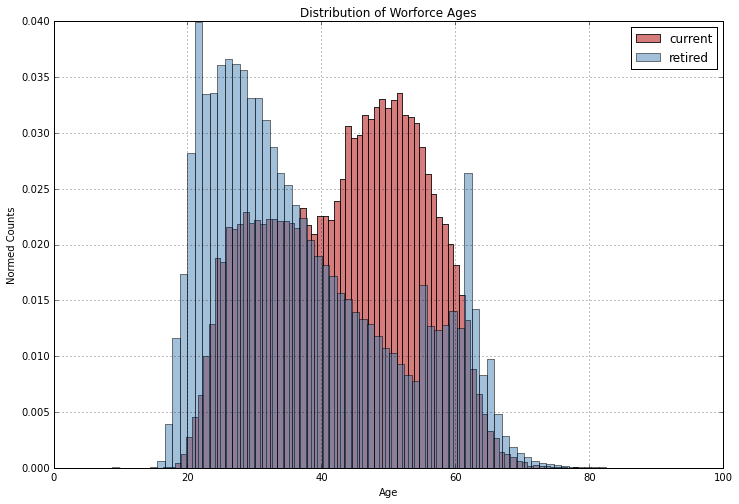

In [177]:
# look at these distributions
plt.figure(figsize=(12,8))
cur_empl.Age_years.hist(bins=80,color='indianred',label='current',alpha=0.8,normed=True)
ret_empl.Age_years.hist(bins=80,color='steelblue',label='retired',alpha=0.5,normed=True)
plt.legend()
plt.xlabel('Age')
plt.ylabel('Normed Counts')
plt.title('Distribution of Worforce Ages')

In [180]:
ret_empl.Age_years.describe(), cur_empl.Age_years.describe()

(count    172554.000000
 mean         37.290239
 std          13.720242
 min           8.777730
 25%          26.103205
 50%          33.687208
 75%          46.853803
 max          98.197773
 dtype: float64, count    70609.000000
 mean        43.646929
 std         11.307643
 min         16.424704
 25%         34.193721
 50%         44.830489
 75%         52.652690
 max         84.311108
 dtype: float64)

In [426]:
ret_empl.Tenure_months.describe(), cur_empl.Tenure_months.describe()

(count    172554.000000
 mean         90.309415
 std         126.594689
 min        -143.838683
 25%           6.340993
 50%          29.799380
 75%         120.511715
 max         781.519128
 dtype: float64, count    70609.000000
 mean       176.848788
 std        135.307106
 min          0.098565
 25%         35.516130
 50%        176.562147
 75%        285.278959
 max        738.972053
 dtype: float64)

In [429]:
sum(ret_empl.Tenure_months < 0), sum(ret_empl.TOT_MO_SERVICE_SFI < 0)

(157, 289)

In [434]:
neg_tenure_idx = ret_empl[ret_empl.Tenure_months < 0].index
ret_empl.ix[neg_tenure_idx][['TOT_MO_SERVICE_SFI','Tenure_months','TERMINATION_DT','HIRE_DT','LAST_HIRE_DT']].tail()

,TOT_MO_SERVICE_SFI,Tenure_months,TERMINATION_DT,HIRE_DT,LAST_HIRE_DT
158088,-1,-0.032855,2001-10-14,2001-10-15,2001-10-15
159047,2,-4.599684,2005-01-18,2005-06-07,2005-06-07
159052,8,-4.928233,2005-08-19,2006-01-16,2006-01-16
161230,-1,-0.032855,2006-11-12,2006-11-13,2006-11-13
165174,-1,-0.032855,2007-02-22,2007-02-23,2007-02-23


In [433]:
ret_empl.ix[neg_tenure_idx]['KEY'].tail().values

array(['849342842050522', '677436375840305', '123550771793141',
       '851255668723609', '874169302580026'], dtype=object)

In [182]:
# how many are younger than 16?
sum(ret_empl.Age_years < 16.01), sum(cur_empl.Age_years < 16.01)

(20, 0)

In [189]:
#
time_checking_cols = [a for a in date_columns]
time_checking_cols.append('Tenure_months')
time_checking_cols.append('Age_years')
time_checking_cols.append('CUR_LOC_MOS')

In [190]:
ret_empl[ret_empl.Age_years<16.01][time_checking_cols]

,TERMINATION_DT,HIRE_DT,SERVICE_DT,LAST_HIRE_DT,BIRTHDATE,Tenure_months,Age_years,CUR_LOC_MOS
4250,1988-12-30,1988-12-27,1988-12-27,1988-12-27,1973-01-22,0.098565,15.937357,0.000000
6094,1989-06-27,1989-06-12,1989-06-12,1989-06-12,1974-01-04,0.492823,15.477388,0.000000
14341,1991-06-14,1991-04-29,1991-04-29,1991-04-29,1975-10-24,1.511325,15.638925,0.000000
15533,1991-08-30,1991-07-29,1991-07-29,1991-07-29,1976-05-25,1.051356,15.263832,0.000000
21907,1993-07-13,1993-06-28,1993-06-28,1993-06-28,1978-04-02,0.492823,15.280259,0.000000
43668,1997-07-31,1997-07-25,1997-07-25,1997-07-25,1981-09-28,0.197129,15.838792,0.000000
43778,1997-08-01,1997-07-25,1997-07-25,1997-07-25,1982-12-22,0.229984,14.609472,0.000000
55834,1999-06-25,1999-06-14,1999-06-14,1999-06-14,1984-02-14,0.361404,15.359658,0.000000
65917,2002-08-13,2002-06-18,2002-06-18,2002-06-18,1986-08-14,1.839874,15.997591,1.870968
66660,2001-08-31,2001-06-25,2001-06-25,2001-06-25,1985-12-23,2.201277,15.688207,2.225806


In [186]:
ret_empl.Tenure_months.describe(), cur_empl.Tenure_months.describe()

(count    172554.000000
 mean         90.309415
 std         126.594689
 min        -143.838683
 25%           6.340993
 50%          29.799380
 75%         120.511715
 max         781.519128
 dtype: float64, count    70609.000000
 mean       176.848788
 std        135.307106
 min          0.098565
 25%         35.516130
 50%        176.562147
 75%        285.278959
 max        738.972053
 dtype: float64)

In [506]:
sum(ret_empl.Tenure_months < 0), sum(cur_empl.Tenure_months < 0)

(157, 0)

# Cleaning up these dates
### remove the negative tenure cases

In [507]:
ret_empl2 = ret_empl[ret_empl.Tenure_months>=0].copy()
len(ret_empl2)

172397

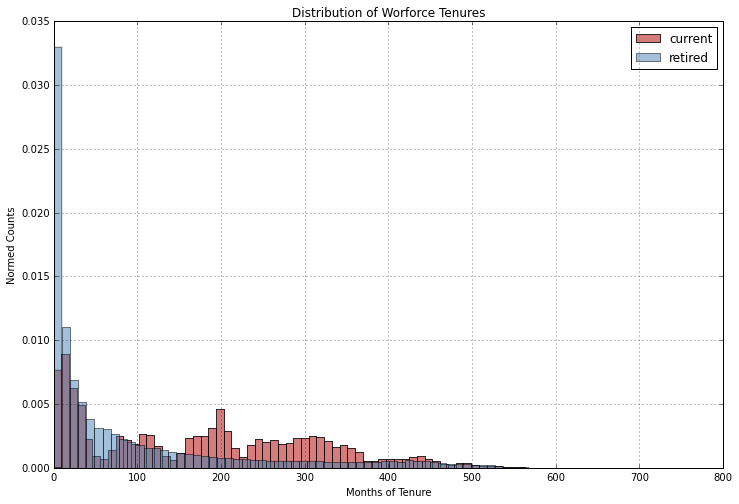

In [515]:
# look at these distributions
plt.figure(figsize=(12,8))
cur_empl.Tenure_months.hist(bins=80,color='indianred',label='current',alpha=0.8,normed=True)
ret_empl2.Tenure_months.hist(bins=80,color='steelblue',label='retired',alpha=0.5,normed=True)
plt.legend()
plt.xlabel('Months of Tenure')
plt.ylabel('Normed Counts')
plt.title('Distribution of Worforce Tenures')

## Begin Survival Analysis
* create a new column 'status' = 1 if retired; 0 otherwise
* join the two *_empl data frame

In [514]:
ret_empl2['status'] = 1
cur_empl['status'] = 0
# now join
print len(ret_empl2),len(cur_empl)
empltbl = pd.concat([ret_empl2,cur_empl],axis=0)
print len(empltbl)

172397 70609
243006


In [509]:
empltbl.shape

(243006, 183)

In [510]:
empltbl.KEY.nunique()

243002

In [511]:
empltbl.KEY.value_counts()

523683991527038    2
632799947463348    2
581059659636142    2
875349983980576    2
67890068082088     1
349655421147894    1
876835293079184    1
260392824774791    1
104021512020389    1
708785808509582    1
226360912074503    1
84544786291451     1
917401196862292    1
801978980564503    1
120997211952227    1
...
807666327714765    1
642474392728170    1
185484926302677    1
772251915080590    1
809626608067018    1
143156963001544    1
357554040084385    1
493145632787210    1
78611075449088     1
606510985925100    1
200666594412488    1
403465081659828    1
179294187193408    1
86182768496770     1
644092650918333    1
Length: 243002, dtype: int64

In [516]:
# duplicated employee keys:
dup_empl_keys = []
for a in empltbl.KEY.value_counts().index[:4]:
    print a
    dup_empl_keys.append(a)

for empkey in dup_empl_keys:
    print empltbl[empltbl.KEY == empkey]

523683991527038
632799947463348
581059659636142
875349983980576
                   KEY PER_ORG LOCATION      LOC_TYPE_DESCR_SFI JOBCODE  \
96667  523683991527038     EMP    00963  CORPORATE HEADQUARTERS    6200   
96668  523683991527038     EMP    00963  CORPORATE HEADQUARTERS    6200   

      LEGACY_DEPT_SFI FULL_PART_TIME EMPL_TYPE SHIFT COMPANY   ...    \
96667       100004773              P         H     1     001   ...     
96668       100004773              F         H     1     001   ...     

       TOT_MO_SERVICE_SFI ADDRCNT1 ADDRCNT3 ADDRCNT5  ADDRCNT10 Age_tdelta  \
96667                  22        0        0        0          0  9001 days   
96668                  22        0        0        0          0  9253 days   

       Tenure_tdelta  Age_years Tenure_months  status  
96667       438 days  24.643901     14.390439       1  
96668       690 days  25.333854     22.669870       1  

[2 rows x 183 columns]
                    KEY PER_ORG LOCATION      LOC_TYPE_DESCR_SFI J

In [308]:
ret_empl.KEY.value_counts().head(10)

490517649562339    2
407999877542257    2
123550771793141    2
523683991527038    2
632799947463348    2
798694575111705    2
581059659636142    2
875349983980576    2
522424719539669    1
711962125595641    1
dtype: int64

## let me check for cases where tenure > age

In [306]:
sum(empltbl.Age_years*12 < empltbl.Tenure_months)

0

### more details on these 3 duplicates in empltbl
875349983980576

632799947463348

581059659636142

In [517]:
cols_to_explore = ['LOCATION','FULL_PART_TIME','STATE','ADDRESS1','SEX','BIRTHDATE','HIRE_DT','TERMINATION_DT','LAST_HIRE_DT','SERVICE_DT','Tenure_months']
empltbl[empltbl.KEY==dup_empl_keys[3]][cols_to_explore]

,LOCATION,FULL_PART_TIME,STATE,ADDRESS1,SEX,BIRTHDATE,HIRE_DT,TERMINATION_DT,LAST_HIRE_DT,SERVICE_DT,Tenure_months
160268,21921,F,MD,4959 WALNUT GROVE ROAD,F,1979-01-05,2001-11-05,2005-03-11,2001-11-05,2001-11-05,40.148668
160269,21921,F,MD,4959 WALNUT GROVE ROAD,F,1979-01-05,2001-11-05,2002-04-05,2001-11-05,2001-11-05,4.961087


In [324]:
dup_indices = empltbl[empltbl.KEY==dup_empl_keys[0]].index
for c in empltbl.columns:
    if empltbl.loc[dup_indices[0],c] != empltbl.loc[dup_indices[1],c]:
        print empltbl.loc[dup_indices,c]#[empltbl.KEY == dup_empl_keys[2]][c]

160268    OPERATIONS CENTER
160269      REGIONAL OFFICE
Name: LOC_TYPE_DESCR_SFI, dtype: object
160268    0600
160269    0599
Name: JOBCODE, dtype: object
160268    12102892175
160269      121075921
Name: LEGACY_DEPT_SFI, dtype: object
160268    PB1
160269    SF2
Name: GRADE, dtype: object
160268    26309.57
160269    22500.00
Name: ANNUAL_RT, dtype: float64
160268     99
160269    150
Name: EXT_FUNC_ID_SFI, dtype: float64
160268      6
160269    510
Name: FUNC_ID_SFI, dtype: float64
160268    WPCOPR
160269       NaN
Name: JOB_FAMILY, dtype: object
160268    PSB
160269    NaN
Name: JOB_FUNCTION, dtype: object
160268    34138.130
160269    26515.548
Name: MAX_RT_ANNUAL, dtype: float64
160268    20671.880
160269    20398.211
Name: MIN_RT_ANNUAL, dtype: float64
160268   2005-03-11
160269   2002-04-05
Name: TERMINATION_DT, dtype: datetime64[ns]
160268    NaN
160269    NaN
Name: ACTRES3, dtype: object
160268    NaN
160269    NaN
Name: ACTRES4, dtype: object
160268    NaN
160269    NaN
Name:

In [317]:
ret_empl[ret_empl.KEY==dup_empl_keys[2]][cols_to_explore]

,LOCATION,FULL_PART_TIME,STATE,ADDRESS1,SEX,BIRTHDATE,HIRE_DT,TERMINATION_DT,LAST_HIRE_DT,SERVICE_DT
145871,05921,F,MN,2907 NEWTON AVE N.,F,1975-11-03,2002-04-15,2005-02-28,2002-04-15,2002-04-15
145872,05921,P,MN,2907 NEWTON AVE N.,F,1975-11-03,2002-04-15,2005-02-28,2002-04-15,2002-04-15


## Keep the first instance for these 3 duplicated employee keys.
* the first 2 cases have longer tenure but same address, sex, birthdate and hire_dt
* the third case have same address,sex, birthdate, hire_dt and termination_dt; the first instance is Fulltime versus Partime 

In [332]:
#empltbl.index = empltbl.KEY
empltbl.head()

In [518]:
empltbl.drop_duplicates(subset='KEY',inplace=True)
len(empltbl)

243002

In [519]:
ret_empl2.Age_years.describe()

count    172397.000000
mean         37.296686
std          13.721343
min          14.609472
25%          26.108681
50%          33.695422
75%          46.859278
max          98.197773
dtype: float64

In [195]:
print sum(ret_empl2.Age_years < 16.01)
ret_empl2[ret_empl2.Age_years < 16.01][time_checking_cols]

18


,TERMINATION_DT,HIRE_DT,SERVICE_DT,LAST_HIRE_DT,BIRTHDATE,Tenure_months,Age_years,CUR_LOC_MOS
4250,1988-12-30,1988-12-27,1988-12-27,1988-12-27,1973-01-22,0.098565,15.937357,0.000000
6094,1989-06-27,1989-06-12,1989-06-12,1989-06-12,1974-01-04,0.492823,15.477388,0.000000
14341,1991-06-14,1991-04-29,1991-04-29,1991-04-29,1975-10-24,1.511325,15.638925,0.000000
15533,1991-08-30,1991-07-29,1991-07-29,1991-07-29,1976-05-25,1.051356,15.263832,0.000000
21907,1993-07-13,1993-06-28,1993-06-28,1993-06-28,1978-04-02,0.492823,15.280259,0.000000
43668,1997-07-31,1997-07-25,1997-07-25,1997-07-25,1981-09-28,0.197129,15.838792,0.000000
43778,1997-08-01,1997-07-25,1997-07-25,1997-07-25,1982-12-22,0.229984,14.609472,0.000000
55834,1999-06-25,1999-06-14,1999-06-14,1999-06-14,1984-02-14,0.361404,15.359658,0.000000
65917,2002-08-13,2002-06-18,2002-06-18,2002-06-18,1986-08-14,1.839874,15.997591,1.870968
66660,2001-08-31,2001-06-25,2001-06-25,2001-06-25,1985-12-23,2.201277,15.688207,2.225806


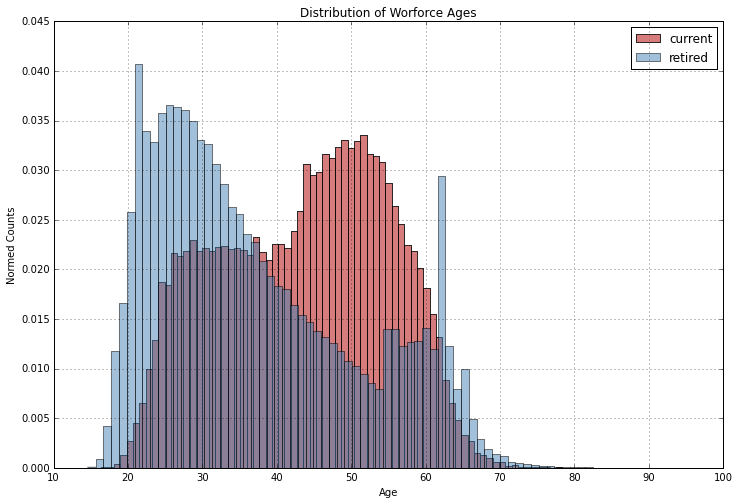

In [520]:
# look at these distributions
plt.figure(figsize=(12,8))
cur_empl.Age_years.hist(bins=80,color='indianred',label='current',alpha=0.8,normed=True)
ret_empl2.Age_years.hist(bins=80,color='steelblue',label='retired',alpha=0.5,normed=True)
plt.legend()
plt.xlabel('Age')
plt.ylabel('Normed Counts')
plt.title('Distribution of Worforce Ages')

In [521]:
sum(ret_empl2.Tenure_months < 0), sum(cur_empl.Tenure_months < 0)

(0, 0)

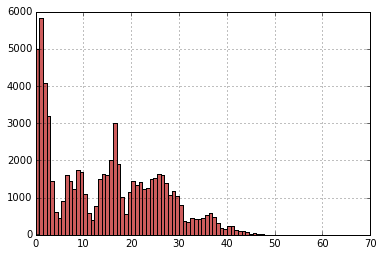

In [522]:
(cur_empl.Tenure_months/12.).hist(bins=80,color='indianred')

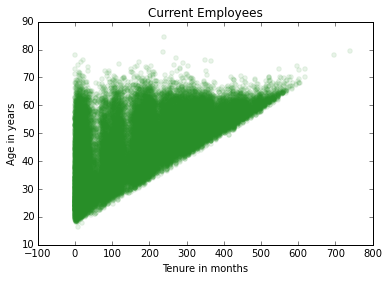

In [264]:
plt.scatter(cur_empl.Tenure_months.values,cur_empl.Age_years,color='forestgreen',alpha=0.1)
plt.xlabel('Tenure in months')
plt.ylabel('Age in years')
plt.title('Current Employees')

In [523]:
cur_empl[['Age_years','Tenure_months']].corr()

,Age_years,Tenure_months
Age_years,1.000000,0.708801
Tenure_months,0.708801,1.000000


In [524]:
empltbl[['Age_years','Tenure_months']].corr()

,Age_years,Tenure_months
Age_years,1.000000,0.695537
Tenure_months,0.695537,1.000000


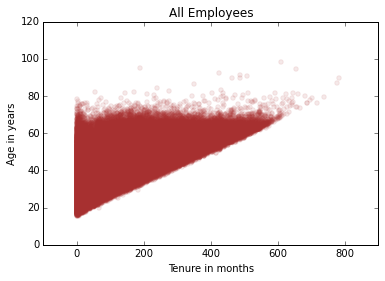

In [341]:
plt.scatter(empltbl.Tenure_months.values,empltbl.Age_years,color='brown',alpha=0.1)
plt.xlabel('Tenure in months')
plt.ylabel('Age in years')
plt.title('All Employees')

In [266]:
# now use lifelines
from lifelines import KaplanMeierFitter

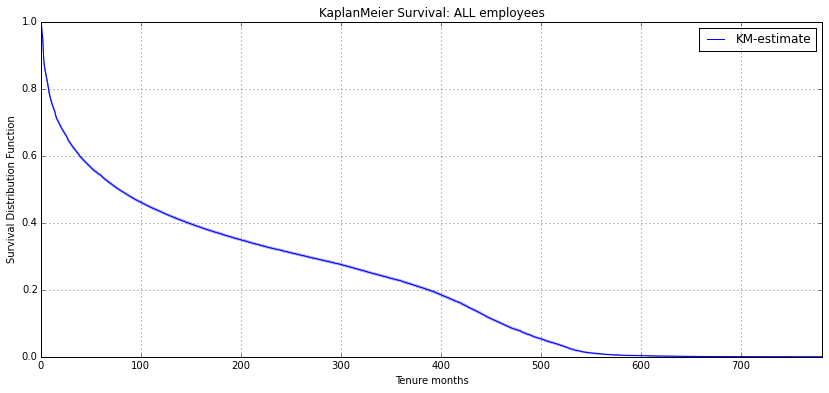

In [529]:
figsize(14,6)
kmf = KaplanMeierFitter()
kmf.fit(empltbl.Tenure_months, event_observed=empltbl.status)
kmf.plot()
plt.ylabel('Survival Distribution Function')
plt.xlabel('Tenure months')
plt.title('KaplanMeier Survival: ALL employees')

In [269]:
kmf.survival_function_

,KM-estimate
timeline,
0.000000,0.999092
0.032855,0.998454
0.065710,0.997826
0.098565,0.997292
0.131420,0.996472
0.164274,0.996415
0.197129,0.996244
0.229984,0.995673
0.262839,0.995195


### look at difference between M & F

In [530]:
male = empltbl[empltbl['SEX'] =='M']
female = empltbl[empltbl['SEX'] =='F']
len(male),len(female)

(90620, 152382)

In [531]:
male.Tenure_months.describe(), female.Tenure_months.describe()

(count    90620.000000
 mean       125.097521
 std        139.808186
 min          0.000000
 25%         11.400645
 50%         60.732253
 75%        209.614160
 max        781.519128
 dtype: float64, count    152382.000000
 mean        109.818388
 std         131.786893
 min           0.000000
 25%           8.870819
 50%          45.438305
 75%         181.556089
 max         738.972053
 dtype: float64)

In [532]:
min_tenure_months= empltbl.Tenure_months.min()
max_tenure_months = empltbl.Tenure_months.max()
print min_tenure_months, max_tenure_months
tenure_month_range = np.linspace(min_tenure_months,max_tenure_months,65)
len(tenure_month_range)

0.0 781.519127703


65

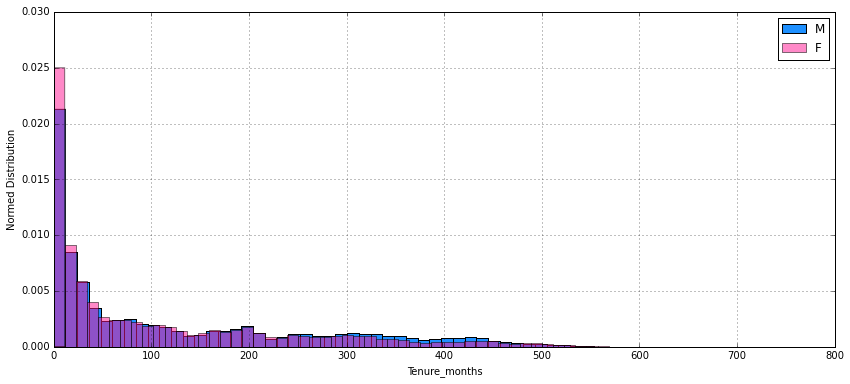

In [533]:
male.Tenure_months.hist(normed=True,color='dodgerblue',bins=65,label='M')
female.Tenure_months.hist(normed=True,color='deeppink',alpha=0.5,bins=65,label='F')
plt.xlabel('Tenure_months')
plt.ylabel('Normed Distribution')
plt.legend()

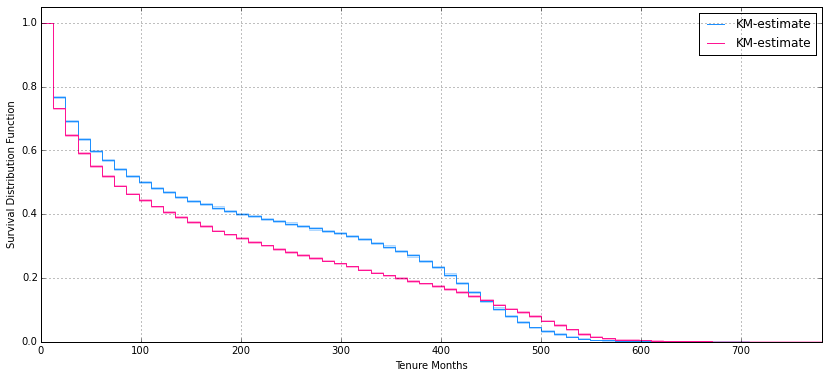

In [534]:
kmf_gender = KaplanMeierFitter()
#plt.figure(figsize=(20,10))
kmf_gender.fit(male.Tenure_months, timeline=tenure_month_range,event_observed=male.status)
ax = kmf_gender.plot(c='dodgerblue',label='Male')
kmf_gender.fit(female.Tenure_months,  timeline=tenure_month_range,event_observed=female.status)
kmf_gender.plot(ax=ax, c='deeppink',label='Female')
ylim(0,1.05)
plt.ylabel('Survival Distribution Function')
plt.xlabel('Tenure Months')

## Hazard Function

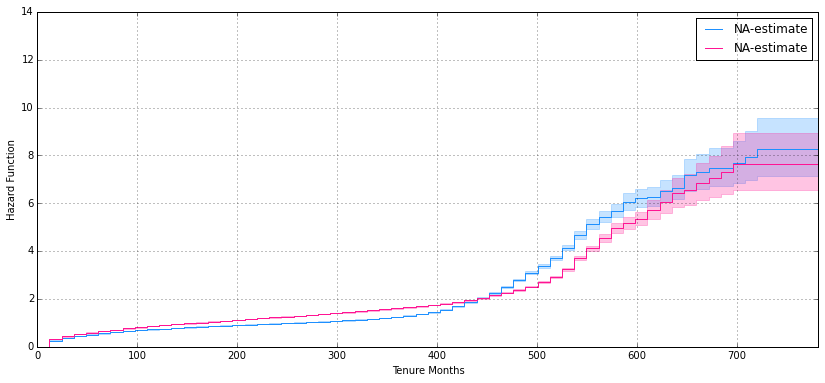

In [535]:
from lifelines import NelsonAalenFitter
#plt.figure(figsize=(12.5,8))
naf = NelsonAalenFitter()
naf.fit(male.Tenure_months,timeline=tenure_month_range, event_observed=male.status)
ax = naf.plot(c='dodgerblue',label='Male')
naf.fit(female.Tenure_months,  timeline=tenure_month_range,event_observed=female.status)
naf.plot(ax=ax, c='deeppink',label='Female')
#ylim(0,1.05)
plt.ylabel('Hazard Function')
plt.xlabel('Tenure Months')
#fit(male.Tenure_months,timeline=tenure_month_range, event_observed=male.status)

### Repeat using age in years as timeline

In [536]:
empltbl.Age_years.describe()

count    243002.000000
mean         39.142082
std          13.380317
min          14.609472
25%          27.729522
50%          36.863180
75%          49.958589
max          98.197773
dtype: float64

In [537]:
sum(empltbl.Age_years > 80)

37

In [353]:
min_age = empltbl.Age_years.min()
max_age = empltbl.Age_years.max()
print min_age, max_age, max_age - min_age
delta_age= int(max_age - min_age)
age_range = np.linspace(min_age,max_age,delta_age)
len(age_range)

15.263831564 98.1977727126 82.9339411487


82

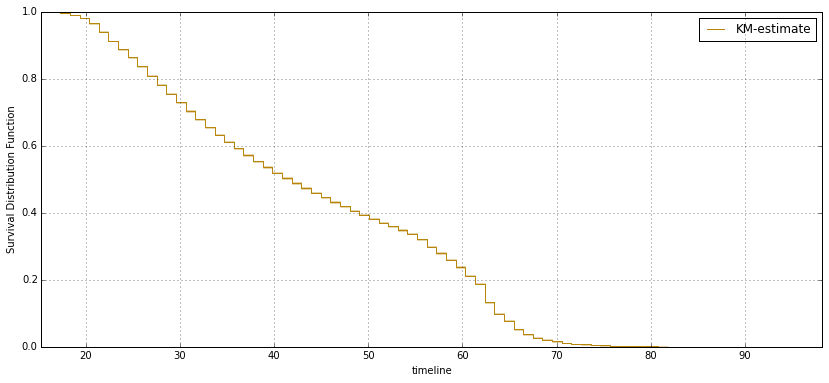

In [538]:
kmf_age = KaplanMeierFitter()
kmf_age.fit(empltbl.Age_years, timeline=age_range,event_observed=empltbl.status)
kmf_age.plot(color='darkgoldenrod')
plt.ylabel('Survival Distribution Function')

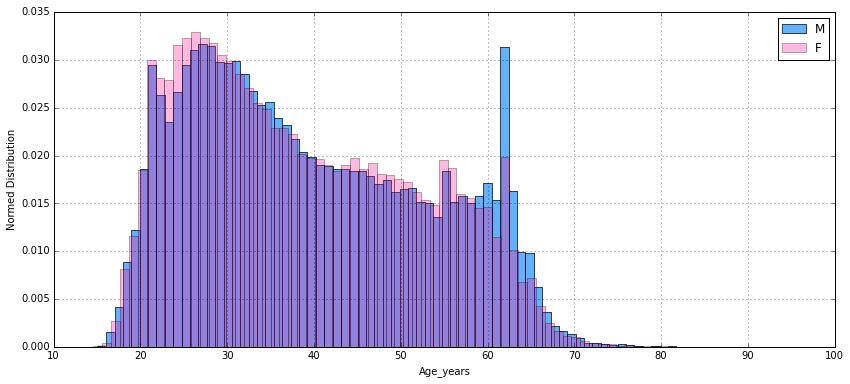

In [539]:
male.Age_years.hist(normed=True,color='dodgerblue',bins=82,alpha=0.7,label='M')
female.Age_years.hist(normed=True,color='deeppink',alpha=0.3,bins=82,label='F')
plt.xlabel('Age_years')
plt.ylabel('Normed Distribution')
plt.legend()

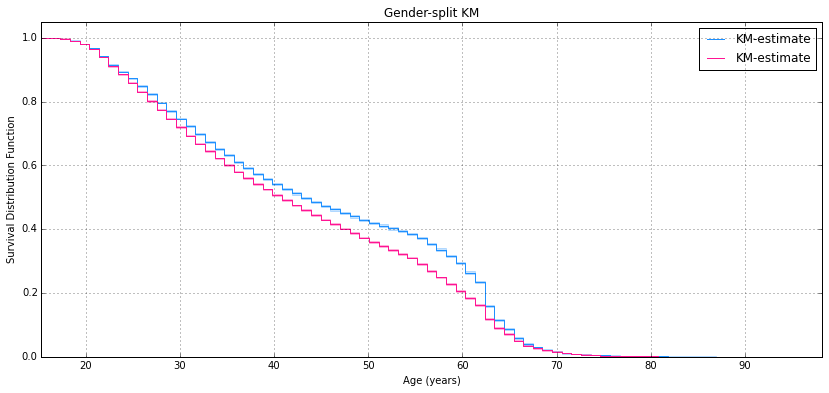

In [540]:
kmf_gender_age = KaplanMeierFitter()
#plt.figure(figsize=(20,10))
kmf_gender_age.fit(male.Age_years, timeline=age_range,event_observed=male.status)
ax = kmf_gender_age.plot(c='dodgerblue',label='Male')
kmf_gender_age.fit(female.Age_years,  timeline=age_range,event_observed=female.status)
kmf_gender_age.plot(ax=ax, c='deeppink',label='Female')
ylim(0,1.05)
plt.ylabel('Survival Distribution Function')
plt.xlabel('Age (years)')
plt.title('Gender-split KM')

## Cox Proportional Hazard Regression


In [541]:
from lifelines import CoxPHFitter

### restrict the dataframe to do linear-regression on.
* first attempt is _ad hoc_ reduction of 185 columns
    * keep age_years, tenure_months, status, sex for sure
* look at cases where there is 'significant' correlation between columns:
    * for example JOBCNTx, LOCCNTx, DEPTCNTx, ...

In [542]:
empltbl.shape

(243002, 183)

In [552]:
empltbl.status.value_counts()

1    172393
0     70609
dtype: int64

In [554]:
summarize_dataframe(empltbl)

KEY object 0 	243002
PER_ORG object 0 	1
LOCATION object 0 	21959
LOC_TYPE_DESCR_SFI object 45 	36
JOBCODE object 0 	3839
LEGACY_DEPT_SFI object 0 	56717
FULL_PART_TIME object 0 	4
EMPL_TYPE object 0 	5
SHIFT object 0 	4
COMPANY object 0 	8
STD_HOURS float64 0 	178
EMPL_CLASS object 0 	12
GRADE object 526 	166
COMP_FREQUENCY object 0 	4
ANNUAL_RT float64 0 	132927
FLSA_STATUS object 0 	3
FTE float64 0 	99
FLOR_SFI int64 0 	115
EEO1CODE object 0 	11
EXT_FUNC_ID_SFI float64 19 	424
FUNC_ID_SFI float64 19 	64
DIVISION_CODE_SFI float64 19 	10
JOB_FAMILY object 84585 	1500
JOB_FUNCTION object 84616 	20
LOC_STATE object 12682 	53
LOC_CITY object 12682 	5126
MAX_RT_ANNUAL float64 0 	1213
MIN_RT_ANNUAL float64 0 	1444
TERMINATION_DT datetime64[ns] 0 	8770
HUBIND object 0 	2
REMOTE object 0 	2
SUPV_DIFF_LOC object 0 	2
REMOTE_SUPV object 0 	2
LOCCNT1 int64 0 	7
LOCCNT3 int64 0 	8
LOCCNT5 int64 0 	9
LOCCNT10 int64 0 	13
JOBCNT1 int64 0 	7
JOBCNT3 int64 0 	9
JOBCNT5 int64 0 	11
JOBCNT10 int64 0 	

In [563]:
c = 'status'
empltbl[c].value_counts()


1    172393
0     70609
dtype: int64

In [ ]:
plt.scatter(empltbl.FLOORCNT1,empltbl.DEPTCNT1,color='burlywood',alpha=0.3)

In [371]:
#pd.crosstab(empltbl, index = 'JOBCNT1',columns =
#(empltbl, 
empltbl[['JOBCNT1','LOCCNT1','DEPTCNT1','GRADECNT1','FLOORCNT1','SUPVCNT1']].corr()

,JOBCNT1,LOCCNT1,DEPTCNT1,GRADECNT1,FLOORCNT1,SUPVCNT1
JOBCNT1,1.000000,0.329361,0.438596,0.721679,0.168862,0.288238
LOCCNT1,0.329361,1.000000,0.614073,0.228802,0.188673,0.326542
DEPTCNT1,0.438596,0.614073,1.000000,0.251160,0.283301,0.441145
GRADECNT1,0.721679,0.228802,0.251160,1.000000,0.106899,0.190856
FLOORCNT1,0.168862,0.188673,0.283301,0.106899,1.000000,0.114109
SUPVCNT1,0.288238,0.326542,0.441145,0.190856,0.114109,1.000000


In [444]:
c='EMPL_CLASS'
empltbl[c].value_counts()

1    237717
D      2985
3      1348
T       490
O       339
4        60
X        30
P        13
5         9
2         9
G         1
F         1
dtype: int64

In [445]:

len(empltbl[c].unique())

12

,ANNUAL_RT,SAL1
ANNUAL_RT,1,1
SAL1,1,1


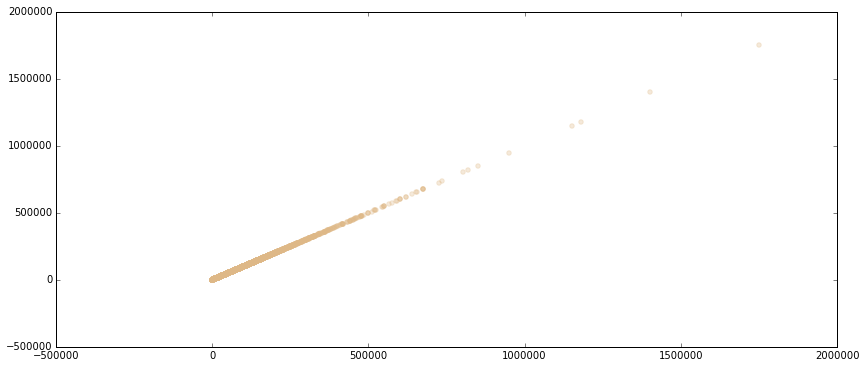

In [544]:
plt.scatter(empltbl.ANNUAL_RT,empltbl.SAL1,color='burlywood',alpha=0.3)
empltbl[['ANNUAL_RT','SAL1']].corr()

In [456]:
len(empltbl[empltbl.ANNUAL_RT>0])

219722

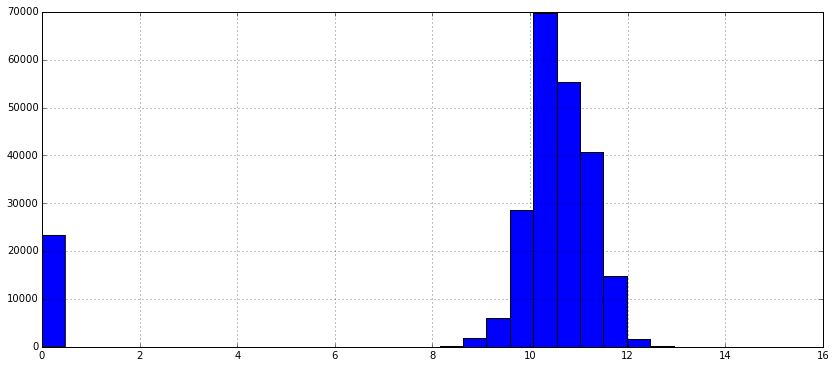

In [545]:
np.log(empltbl.ANNUAL_RT+1).hist(bins=30)

count     192736.000000
mean       46438.526873
std        36610.289517
min            0.000000
25%        25000.000000
50%        37768.265000
75%        63171.840000
max      1750000.000000
dtype: float64

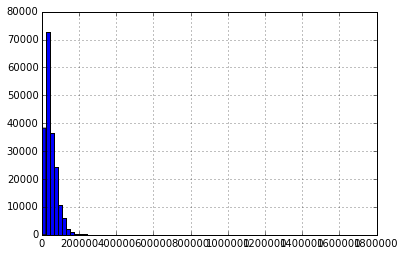

In [376]:
empltbl.SAL1.hist(bins=80)
empltbl.SAL1.describe()

In [377]:
sum(empltbl.SAL1 == 0.0)

18566

In [384]:
ret_empl[ret_empl.KEY==dup_empl_keys[2]][['TOT_MO_SERVICE_SFI','Tenure_months']]#.head()

,TOT_MO_SERVICE_SFI,Tenure_months
145871,34,34.497628
145872,34,34.497628


In [385]:
empltbl.RELOCATE_ALL_SFI.value_counts()

N    171218
Y     21518
dtype: int64

In [ ]:
empltbl.LOCATION.value_counts().hist(bins=50)

In [588]:
empltbl.LOC_STATE.unique()

array([nan, 'MI', 'MD', 'AZ', 'TX', 'LA', 'AL', 'PA', 'FL', 'CA', 'IL',
       'OH', 'VA', 'OR', 'MN', 'MO', 'WI', 'IN', 'NY', 'NC', 'NJ', 'CO',
       'NM', 'KY', 'UT', 'TN', 'NE', 'WV', 'WA', 'NV', 'MT', 'DE', 'AR',
       'ID', 'IA', 'SD', 'WY', 'OK', 'KS', 'ND', 'AK', 'GA', 'ME', 'CT',
       'SC', 'MS', 'HI', 'NH', 'VT', 'MA', 'DC', 'RI', 'ON'], dtype=object)

## drop those from ONtario

In [585]:
empltbl[empltbl.LOC_STATE=='ON'][['zip5','ADDRESS1','LOC_STATE','POSTAL_SFI','TERMINATION_DT','LOC_TYPE_DESCR_SFI','LOCATION']]

,zip5,ADDRESS1,LOC_STATE,POSTAL_SFI,TERMINATION_DT,LOC_TYPE_DESCR_SFI,LOCATION
77033,L0K 1,20 PENINSULA TR,ON,L0K 1S0,2009-05-31,OPERATIONS CENTER,03921
84605,N3R 5,7 MCINTOSH COURT,ON,N3R 5Y1,2013-04-30,AGENCY FIELD OFFICE(AFO),03359
113316,L1A 0,14 FENTON LANE,ON,L1A 0A3,2002-06-30,OPERATIONS CENTER,03921
113317,L4A 1,47 WHITEWOOD DR,ON,L4A 1R9,2003-06-30,OPERATIONS CENTER,03921
119293,L1X 2,2294 BEARE CRT,ON,L1X 2L2,2011-06-30,OPERATIONS CENTER,03921
119582,L1S 4,40 FARROW CRESCENT,ON,L1S 4W6,2014-12-31,OPERATIONS CENTER,03921
126865,L4L 8,17 RADLEY DRIVE,ON,L4L 8J7,2014-12-31,OPERATIONS CENTER,03921


In [589]:
empltbl[empltbl.LOCATION == '03359']#'03921']

,KEY,PER_ORG,LOCATION,LOC_TYPE_DESCR_SFI,JOBCODE,LEGACY_DEPT_SFI,FULL_PART_TIME,EMPL_TYPE,SHIFT,COMPANY,...,ADDRCNT1,ADDRCNT3,ADDRCNT5,ADDRCNT10,Age_tdelta,Tenure_tdelta,Age_years,Tenure_months,status,zip5
84605,922380983327693,EMP,03359,AGENCY FIELD OFFICE(AFO),1764,10303135936,F,N,1,A01,...,0,0,0,0,21498 days,8854 days,58.859525,290.897144,1,N3R 5


In [590]:
empltbl=empltbl[empltbl.LOC_STATE!='ON'].copy()
len(empltbl)

242995

In [591]:
def summarize_dataframe2(df,show_example=False):
    nrow = len(df)
    summary_df = pd.DataFrame(columns = ['Column','datatype','nmissing','arity','accepted values'])
    len_df = len(summary_df)
    for col in df.columns:
        nmiss = nrow - df[col].value_counts().sum()
        narity = len(df[col].unique())
        if show_example:
            print col, df[col].dtype,nmiss, "\t", narity,":\t", df[col].ix[8320]
        else:
            print col, df[col].dtype,nmiss, "\t", narity
        accept_val = None
        if narity < 20:
            accept_val = df[col].unique()
        summary_df.loc[len_df] = [col,df[col].dtype,nmiss,narity,accept_val]
        len_df+=1
    return summary_df

In [592]:
sdf = summarize_dataframe2(empltbl)

KEY object 0 	242995
PER_ORG object 0 	1
LOCATION object 0 	21957
LOC_TYPE_DESCR_SFI object 45 	36
JOBCODE object 0 	3835
LEGACY_DEPT_SFI object 0 	56710
FULL_PART_TIME object 0 	4
EMPL_TYPE object 0 	5
SHIFT object 0 	4
COMPANY object 0 	7
STD_HOURS float64 0 	178
EMPL_CLASS object 0 	12
GRADE object 526 	165
COMP_FREQUENCY object 0 	4
ANNUAL_RT float64 0 	132921
FLSA_STATUS object 0 	3
FTE float64 0 	99
FLOR_SFI int64 0 	115
EEO1CODE object 0 	11
EXT_FUNC_ID_SFI float64 19 	424
FUNC_ID_SFI float64 19 	64
DIVISION_CODE_SFI float64 19 	10
JOB_FAMILY object 84584 	1496
JOB_FUNCTION object 84615 	20
LOC_STATE object 12682 	52
LOC_CITY object 12682 	5125
MAX_RT_ANNUAL float64 0 	1210
MIN_RT_ANNUAL float64 0 	1441
TERMINATION_DT datetime64[ns] 0 	8770
HUBIND object 0 	2
REMOTE object 0 	2
SUPV_DIFF_LOC object 0 	2
REMOTE_SUPV object 0 	2
LOCCNT1 int64 0 	7
LOCCNT3 int64 0 	8
LOCCNT5 int64 0 	9
LOCCNT10 int64 0 	13
JOBCNT1 int64 0 	7
JOBCNT3 int64 0 	9
JOBCNT5 int64 0 	11
JOBCNT10 int64 0 	

In [569]:
[z[:5] for z in empltbl.POSTAL_SFI.head()]

['60938', '48911', '21236', '85268', '78756']

In [570]:
# function to truncate POSTAL_ZIP to zip5
def truncate_postal_zip(in_zip):
    try:
        out_zip = in_zip[:5]
        #print out_zip
    except:
        out_zip = str(in_zip)[:5]
    return out_zip

In [571]:
empltbl['zip5'] = empltbl['POSTAL_SFI'].apply(lambda x: truncate_postal_zip(x))

In [573]:
len(empltbl.zip5.unique()), sum(empltbl.zip5.isnull())

(18924, 0)

In [550]:
len(empltbl.LEGACY_DEPT_SFI.unique())

56717

In [596]:
sdf.to_csv('employee_table_summary.csv')
# save to file

In [598]:
# now apply some logic to these columns for keeping and not
columns_to_fix_missing = []
columns_to_fix_NY = []
columns_to_omit = []

In [602]:
n_employees = sdf.ix[0]['arity']
n_employees

242995

In [603]:
# define the set of columns that have missing values smaller than some threshold 
sdf['x_missing'] = sdf['nmissing']/n_employees
len(sdf[sdf['x_missing'] > 0]), len(sdf)

(82, 184)

In [608]:
#
missing_threshold = 0.40
print len(sdf[(sdf['x_missing']>0) & (sdf['x_missing'] <= missing_threshold)])
columns_to_fix_missing = sdf[(sdf['x_missing']>0) & (sdf['x_missing'] <= missing_threshold)].Column


53


3      LOC_TYPE_DESCR_SFI
12                  GRADE
19        EXT_FUNC_ID_SFI
20            FUNC_ID_SFI
21      DIVISION_CODE_SFI
22             JOB_FAMILY
23           JOB_FUNCTION
24              LOC_STATE
25               LOC_CITY
94                ACTRES1
95                ACTRES2
96                ACTRES3
125                  SAL2
126                  SAL3
127                  SAL4
128                  SAL5
129                  SAL6
130                  SAL7
131                  SAL8
132                  SAL9
133                 SAL10
134                MERIT1
135                MERIT2
136                MERIT3
137                MERIT4
138                MERIT5
139                MERIT6
140                MERIT7
141                MERIT8
142                MERIT9
143               MERIT10
144                 PERF1
145                 PERF2
146                 PERF3
147                 PERF4
148                 PERF5
149                 PERF6
150                 PERF7
151         

In [611]:
empltbl.EXT_FUNC_ID_SFI.head()

0    99999
1       77
2      321
3      321
4       94
Name: EXT_FUNC_ID_SFI, dtype: float64

In [ ]:
columns_to_fix_missing = ['GRADE']

In [ ]:
list_reduced_columns = ['LOCATION','JOBCODE', FULL_PART_TIMELOC_TYPE_DESCR','JOBCODE','JOB_FUNC_ID_SFI','FUNC_CNT','EXTFUNC_CNT'

In [ ]:
benefits_df = pandas_read_hdfs(infilenames[4])

In [ ]:
benefits_df.shape, benefits_df.columns

In [ ]:
histcurr_df[histcurr_df.SKEY == '148161780158'][['KEY','LOCATION','JOBCODE','CUR_JOB_MOS','MAX_RT_ANNUAL','TERMINATION_DT','INTERN']]#,COUNT','COUNT.1']]

In [ ]:
tkey = '148161780158'
cur_empl[cur_empl.SKEY == tkey][['KEY','ACTRES1','LOCATION','FUNC_ID_SFI','JOBCODE','CUR_JOB_MOS','Tenure_months','TERMINATION_DT','HIRE_DT','INTERN']]#,COUNT','COUNT.1']]

In [235]:
tkey = '148161780158'
ret_empl[ret_empl.SKEY == tkey][['KEY','LOCATION','JOB_FUNCTION','JOBCODE','CUR_JOB_MOS','Tenure_months','TERMINATION_DT','HIRE_DT','INTERN','COMP_FREQUENCY']]#,COUNT','COUNT.1']]

,KEY,LOCATION,JOB_FUNCTION,JOBCODE,CUR_JOB_MOS,Tenure_months,TERMINATION_DT,HIRE_DT,INTERN,COMP_FREQUENCY
171417,476840249019135,00915,NSA,1043,6.838710,6.768106,2013-05-09,2012-10-15,Y,H
171418,914194287692287,00915,NSA,1043,2.451613,2.431261,2013-08-02,2013-05-20,Y,H
171419,379825847865933,00915,NSA,1043,2.451613,38.604489,2014-08-01,2011-05-14,Y,H
171420,654490583415372,00915,NSA,1043,2.193548,25.429680,2014-08-01,2012-06-18,Y,H
171421,204950647058408,00915,PTD,1446,15.838710,180.439023,2014-09-05,1999-08-23,N,A


In [226]:
sum(cur_empl.JOBCODE == 1043), sum(ret_empl.JOBCODE == '1043')

(29, 179)

In [244]:
cur_empl[cur_empl.JOBCODE==1043][['LOCATION','ACTRES1','INTERN','CUR_JOB_MOS','Tenure_months','Age_years','HIRE_DT','COMP_FREQUENCY','MAX_RT_ANNUAL']]

,LOCATION,ACTRES1,INTERN,CUR_JOB_MOS,Tenure_months,Age_years,HIRE_DT,COMP_FREQUENCY,MAX_RT_ANNUAL
46141,00523,LEAVE OF ABSENCE;MISCELLANEOUS DATA CHANGE;MIS...,Y,11.354839,43.072753,22.278349,2011-05-31,H,0
46142,00523,LEAVE OF ABSENCE;MISCELLANEOUS DATA CHANGE;MIS...,Y,7.322581,7.392349,22.108599,2014-05-21,H,0
46143,00523,LEAVE OF ABSENCE;MISCELLANEOUS DATA CHANGE;EMP...,Y,4.193548,4.238280,21.810167,2014-08-25,H,0
46175,00523,MISCELLANEOUS DATA CHANGE;MISCELLANEOUS DATA C...,Y,23.548387,35.516130,24.200360,2012-01-16,H,0
46249,00523,LEAVE OF ABSENCE;REHIRE,Y,4.193548,67.582497,23.368036,2009-05-15,H,0
46250,00523,TRANSFER W/ JOB NUMBER CHANGE;MISCELLANEOUS DA...,Y,6.870968,30.686462,21.032602,2012-06-11,H,0
46251,00523,LEAVE OF ABSENCE;MISCELLANEOUS DATA CHANGE;MIS...,Y,19.580645,19.647221,21.971704,2013-05-13,H,0
46252,00523,LEAVE OF ABSENCE;MISCELLANEOUS DATA CHANGE;MIS...,Y,15.806452,15.836054,21.415909,2013-09-06,H,0
46253,00523,LEAVE OF ABSENCE;REHIRE;RETURN TO SCHOOL;EMPLO...,Y,4.193548,11.367790,21.352937,2014-01-20,H,0
46254,00523,LEAVE OF ABSENCE;MISCELLANEOUS DATA CHANGE;MIS...,Y,11.354839,11.367790,21.730768,2014-01-20,H,0


In [ ]:
%pylab inline

In [ ]:
benefits_df[benefits_df.columns[-1]].hist(color='steelblue',bins=51)
plt.ylim(0,20000)

In [ ]:
benefits_df[benefits_df.columns[-1]].value_counts()

# Working in Impala
## Step 1 is to connect to the correct host
Using impyla seems to mimics the impala-shell (CLI) pretty closely.

Some important points to keep in mind/equivalencies

* `impala-shell -i host:port` is equivalent to `connect(host=hostname,port=portnumber)`
* `cursor = connect(...).cursor()` yields access to the CLI via:
    - `cursor.execute(query)` followed by
    - `cursor.fetchall()` to return the results
* note that the queries don't have to end in a semicolon.    


In [ ]:
# connect to the correct host
myhostname = 'ac00h1pdata02.opr.statefarm.org' #hostname of G-building
myhostname = '
portnum = 21050 # default port number ??

In [ ]:
# connect to the correct host
myhostname = 'da74wbdn01.opr.statefarm.org' #hostname of PHDac00h1pdata02.opr.statefarm.org' #hostname of G-building
#myhostname = '' 
#you may use any of the datanodes from da74wbdn01 to da74wbdn27
portnum = 21050 # default port number ??

In [ ]:
from impala.dbapi import connect
conn = connect(host=myhostname, port=portnum,use_kerberos=True)
cur = conn.cursor()

In [ ]:
cur.execute('SHOW databases')

In [ ]:
cur.fetchall()

## Some utility functions 
1. list databases
    * type `cursor.execute("use dbasename")` to change to database
2. list tables
3. count lines in a table

In [ ]:
# list databases
def listDatabases(cursor):
    """
    input: the cursor connection input
    output: list of tables in active database
    """
    cursor.execute('SHOW databases')
    dbList = cursor.fetchall()
    return dbList

# list tables
def listTables(cursor):
    """
    input: the cursor connection input
    output: list of tables in active database
    """
    cursor.execute('SHOW tables')
    tblList = cursor.fetchall()
    return tblList
# count the number of lines in a given table
def countLines(cursor,tablename):
    qstring = "'select count(*) from "+tablename+"'"
    return cursor.execute(qstring)

In [ ]:
cur.close()

In [ ]:
# list the databases
listDatabases(cur)

In [ ]:
# change to desired database
cur.execute("use vehrepat")

In [ ]:
myTables=listTables(cur)
print len(myTables)
myTables

## See if I can create a new table from within notebook

In [ ]:
cur.execute("use default")

#### following https://github.com/cloudera/impyla/tree/master/examples/logr
## 2. create some fake data for classification

In [ ]:
import numpy as np
import sklearn.preprocessing
rows=10000
cols=2

In [ ]:
class0 = np.random.multivariate_normal([2,2], np.diag([1,1]),rows/2)
class1 = np.random.multivariate_normal([-2,-2], np.diag([1,1]),rows - rows/2)

In [ ]:
data = np.vstack((np.hstack((class0, np.zeros((rows / 2, 1)))),
                  np.hstack((class1, np.ones((rows - rows / 2, 1))))))
data = data[np.random.permutation(rows)]
scaled_obs = sklearn.preprocessing.StandardScaler().fit_transform(data[:, :2])
data = np.hstack((scaled_obs, data[:, 2].reshape(rows, 1)))

perform in-memory logistic regression with scikit-learn

In [ ]:
import sklearn.linear_model
inmemory_estimator = sklearn.linear_model.LogisticRegression(fit_intercept=False)
inmemory_estimator.fit(data[:, :cols], data[:, cols])

#3. Push the data into Impala


In [ ]:
# create the table to hold the data
cur.execute("CREATE TABLE test_logr (%s, label BOOLEAN)" % ', '.join(['feat%i DOUBLE' % i for i in xrange(cols)]))
# push the data to Impala with INSERT statements in batches of 1000 rows
data_strings = []
for i in xrange(rows):
    row_string = '(' + ', '.join([str(val) for val in data[i, :-1]]) + ', %s' % ('true' if data[i, -1] > 0 else 'false') + ')'
    data_strings.append(row_string)
    if (i + 1) % 1000 == 0:
        data_query = 'INSERT INTO test_logr VALUES %s' % ', '.join(data_strings)
        cursor.execute(data_query)
        data_strings = []

## 3b. Let me try to create the table from a dataset already in HDFS

In [ ]:
!hdfs dfs -ls /user/kesj/sample_data

In [ ]:
my_infile = '/user/kesj/sample_data/impyla_census_raw.csv'

In [ ]:
create_table_query = """
    CREATE EXTERNAL TABLE IF NOT EXISTS census_text (age INT, workclass STRING,
            final_weight INT, education STRING, education_num INT,
            marital_status STRING, occupation STRING, relationship STRING,
            race STRING, sex STRING, hours_per_week INT, native_country STRING,
            income STRING)
    ROW FORMAT DELIMITED FIELDS TERMINATED BY '\t'
    STORED AS TEXTFILE
    LOCATION '/user/kesj/sample_data/impyla_census_raw.csv'
"""

In [ ]:
cur.execute(create_table_query)

In [ ]:
from impala.util import as_pandas
#cur.execute('SELECT * FROM y1753caale')
#cur.execute('select * FROM p3533eeb_detl')
cur.execute('select * FROM y1753caaestparty')
le = as_pandas(cur)
print len(le)


In [ ]:
le.head()

In [ ]:
#sq1 = "'select * from "+myTables[1][0]+"'"
#cur.execute(sq1)
cur.execute('select * from y1753caadetl')
detl = as_pandas(cur)

In [ ]:
print shape(detl)

In [ ]:
len(le.groupby('los_est_dim_id'))

In [ ]:
le.los_est_dim_id.head()

In [ ]:
ledi0 = 85051447
sum(detl['los_est_dim_id']==ledi0)
#detl[['los_est_dim_id','est_ver_num','prt_clas_cd']]

In [ ]:
detl[detl['los_est_dim_id']==ledi0][['est_ver_num','oem_prt_num','line_desc_txt','prt_clas_cd','prt_qty_cnt','price_amt','ver_num',]]

In [ ]:
print len(le[le['los_est_dim_id']==ledi0])
le[le['los_est_dim_id']==ledi0][['vndr_veh_cd','los_tstmp','prmry_poi_cd','scdy_poi_cd','fdw_rplc_tstmp']]

In [ ]:
le.columns.values

In [ ]:
len(detl.prt_clas_cd.unique())

In [ ]:
y17533caaPRTcounts = detl.prt_clas_cd.value_counts()
y17533caaPRTcounts.tail(-1).hist(color='steelblue',bins=50)

In [ ]:
detl[detl.prt_clas_cd == '88JHR']['line_desc_txt']

In [ ]:
le[le.los_est_dim_id == ledi0]['vndr_cd']

In [ ]:
cur.execute("CREATE external TABLE page_view(viewTime INT, userid BIGINT,\
                page_url STRING, referrer_url STRING,\
                ip STRING COMMENT 'IP Address of the User')\
COMMENT 'This is the page view table'\
PARTITIONED BY(dt STRING, country STRING)\
CLUSTERED BY(userid) SORTED BY(viewTime) INTO 32 BUCKETS\
ROW FORMAT DELIMITED\
        FIELDS TERMINATED BY '1'\
        COLLECTION ITEMS TERMINATED BY '2'\
        MAP KEYS TERMINATED BY '3'\
STORED AS SEQUENCEFILE;")

In [ ]:
from pandas import *
from StringIO import StringIO

s = "sshpass -f myfilewithpassword ssh myusername@myhostname \"hive -S -e \\\"" \
"set hive.cli.print.header=true;" \
"SELECT * from mytable;\\\"\""

t = !$s
df = read_csv(StringIO(t.n), sep='\t')

In [ ]:
from pandas import *
from StringIO import StringIO

s = """
sshpass -f myfilewithpassword ssh myusername@myhostname \"
hive -S -e \\\"
set hive.cli.print.header=true;
SELECT * from mytable;
\\\"\"
"""

t = !$s
df = read_csv(StringIO(t.n), sep='\t'

In [ ]:
hdfsfiles = !hadoop fs -ls 